# 1. Hypothesis testing

In this mission, we'll learn about hypothesis testing and statistical significance. `A hypothesis is a pattern or rule about a process in the world that can be tested. We use hypothesis testing to determine if a change we made had a meaningful impact or not.`

You can use hypothesis testing to help you determine:

* if a new banner ad on a website caused a meaningful drop in the user engagement,
* if raising the price of a product caused a meaningful drop in sales,
* if a new weight loss pill helped people lose more weight.

Observing a decrease in user engagement or sales after instituting `a change doesn't automatically imply that the change was the cause`. `Hypothesis testing allows us to calculate the probability that random chance was actually responsible for the difference in outcome`. Every process has some inherent amount of randomness that we can't measure and understanding the role of chance helps us reach a conclusion that's more likely to be correct.

We first set up a **null hypothesis** that describes the status quo. We then state an **alternative hypothesis**, which we used to compare with the null hypothesis to decide which describes the data better. In the end, we either need to:

* reject the null hypothesis
* fail to reject the null hypothesis

We can frame each of the studies above as these rival pairs of hypotheses:

if a new banner ad on a website caused a meaningful drop in the user engagement:

* null hypothesis: users who were exposed to the banner ad spent the same amount of time on the website than those who weren't.
* alternative hypothesis: users who were exposed to the banner ad spent less time on the website than those who weren't.

if raising the price of a product caused a meaningful drop in sales:

* null hypothesis: the number of purchases of the product was the same at the lower price than it was at the higher price.
* alternative hypothesis: the number of purchases of the product was lower at the higher price than it was at the lower price.

if a new weight loss pill helped people lose more weight:

* null hypothesis: patients who went on the weight loss pill lost no more weight than those who didn't.
* alternative hypothesis: patients who went on the weight loss pill lost more weight than those who didn't.

# 2. Research design

To help us determine if the weight loss pill was effective, we conducted a study where we invited 100 volunteers and split them into 2 even groups randomly:

* Group A was given a placebo, or fake, pill and instructed to consume it on a daily basis.
* Group B was given the actual weight loss pill and instructed to consume it on a daily basis.

Both groups were instructed to change nothing else about their diets. Group A is referred to as the control group while group B is referred to as the treatment group. This type of study is called a `blind experiment` since the participants didn't know which pill they were receiving. This helps us reduce the potential bias that is introduced when participants know which pill they were given. For example, participants who are aware they were given the weight loss pill may try to add healthier foods to their diet to help them lose more weight. Both groups were weighed before the study began and a month later, after the study ended.

`Understanding the research design for a study is an important first step that informs the rest of your analysis. It helps us uncover potential flaws in the study that we need to keep in mind as we dive deeper.` The weight loss pill study we conducted is known as an experimental study. Experimental studies usually involve bringing in participants, instructing them to perform some tasks, and observing them. A key part of running an experimental study is random assignment, which involves assigning participants in the study to random groups without revealing which group each participant is in`. Before exploring and analyzing a dataset, it's important to understand how the study was conducted. Flaws in how the study was run can lead you to reach the wrong conclusions.`

# 3. Statistical significance

Statistics helps us determine if the difference in the weight lost between the 2 groups is `because of random chance or because of an actual difference in the outcomes.` `If there is a meaningful difference, we say that the results are statistically significant.`

Now that we're familiar with the study, let's state our null and alternative hypotheses more precisely. Our null hypothesis should describe the default position of skepticism, which is that there's no statistically significant difference between the outcomes of the 2 groups. Put another way, it should state that any difference is due to random chance. Our alternative hypothesis should state that there is in fact a statistically significant difference between the outcomes of the 2 groups.

* Null hypothesis: participants who consumed the weight loss pills lost the same amount of weight as those who didn't take the pill.
* Alternative hypothesis: participants who consumed the weight loss pills lost more weight than those who didn't take the pill.

The lists weight_lost_a and weight_lost_b contain the amount of weight (in pounds) that the participants in each group lost. Let's now explore the data to become more familiar with it.

In [9]:
import pandas as pd
weight_loss=pd.read_csv('weight_loss.csv')
weight_loss.head()
weight_lost_a=weight_loss.iloc[:,0]
weight_lost_b=weight_loss.iloc[:,1]

In [10]:
import numpy as np
import matplotlib.pyplot as plt

mean_group_a=np.mean(weight_lost_a)
print(mean_group_a)
mean_group_b=np.mean(weight_lost_b)
print(mean_group_b)

2.816326530612245
5.346938775510204


# 4. Test statistic

`To decide which hypothesis more accurately describes the data, we need to frame the hypotheses more quantitatively. The first step is to decide on a test statistic, which is a numerical value that summarizes the data and we can use in statistical formulas. We use this test statistic to run a statistical test that will determine how likely the difference between the groups were due to random chance.`

Since we want to know if the amount of weight lost between the groups is meaningfully different, we will use the difference in the means, also known as the mean difference, of the amount of weight lost for each group as the test statistic.

In [15]:
mean_group_a = np.mean(weight_lost_a)
mean_group_b = np.mean(weight_lost_b)
mean_difference=mean_group_b-mean_group_a
print(mean_difference)

2.5306122448979593


,3,5
0,2,4
1,3,5
2,4,5
3,3,4
4,2,5


# 5. Permutation test

`Now that we have a test statistic, we need to decide on a statistical test. The purpose of a statistical test is to work out the likelihood that the result we achieved was due to random chance.`

`The` **`permutation test`** `is a statistical test that involves simulating rerunning the study many times and recalculating the test statistic for each iteration. The goal is to calculate a distribution of the test statistics over these many iterations. This distribution is called the` **`sampling distribution`** `and it approximates the full range of possible test statistics under the null hypothesis.`

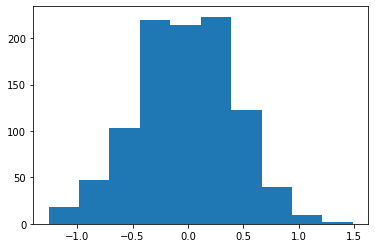

In [16]:
mean_difference = 2.52
all_values=[3,5,2,4,3, 5, 4, 5, 3, 4, 2, 5, 2, 7,2,5,1, 4, 3, 3,2,3, 3, 5,1, 10,3,3, 4, 4, 1, 9, 3,7,2, 6, 1, 9, 3, 4, 4, 2, 3, 
            5, 2,7, 3, 7,7,7, 2, 5, 3, 4, 2, 8, 5, 9,1, 6, 1, 7, 1, 6, 3,7, 2, 6, 4, 3, 10, 5, 2,5, 3, 4, 2,2,5,3,6,3,2,5,3,6,2,9,3,7,4, 6,1,4,3,5,3,4,1,3]
mean_differences = []
for i in range(1000):
    group_a = []
    group_b = []
    for value in all_values:
        assignment_chance = np.random.rand()
        if assignment_chance >= 0.5:
            group_a.append(value)
        else:
            group_b.append(value)
    iteration_mean_difference = np.mean(group_b) - np.mean(group_a)
    mean_differences.append(iteration_mean_difference)
    
plt.hist(mean_differences)
plt.show()

# 6. Sampling distribution


By randomly assigning participants to group A or group B, we account for the effect of random chance. Someone in group B who just happened to lose more weight (but not because of the pills) makes the results look better than they were. By creating many permutations, we're able to see all possible configurations of this error. Creating a histogram enables us to see how likely different values of our test statistic are if we repeated our experiment many times.

The histogram we generated in the previous step using Matplotlib is a visual representation of the sampling distribution. Let's now create a dictionary that contains the values in the sampling distribution so we can benchmark our observed test statistic against it.

We need to first count up how frequently each value in the list, mean_differences, occurs. As we loop over mean_differences, we need a way to check if the test statistic is already in our dictionary:

* If it is, we look up the value at that key, add 1 to it, and assign the new value to the key.
* If it isn't, we add the key to the dictionary and assign the value 1 to it.

# 7. Dictionary representation of a distribution

To check if a key exists in a dictionary, we need to use the get() method to:

* return the value at the specified key if it exists in the dictionary or
* return another value we specify instead.

Here are the parameters the method takes in:

* the required parameter is the key we want to look up,
* the optional parameter is the default value we want returned if the key is not found.

In [17]:
sampling_distribution = {}
for df in mean_differences:
    if sampling_distribution.get(df, False):
        sampling_distribution[df] = sampling_distribution[df] + 1
    else:
        sampling_distribution[df] = 1

# 8. P value

In the sampling distribution we generated, most of the values are closely centered around the mean difference of 0. This means that if it were purely up to chance, both groups would have lost the same amount of weight (the null hypothesis). But since the observed test statistic is not near 0, it could mean that the weight loss pills could be responsible for the mean difference in the study.

We can now use the sampling distribution to determine the number of times a value of 2.52 or higher appeared in our simulations. If we then divide that frequency by 1000, we'll have the probability of observing a mean difference of 2.52 or higher purely due to random chance.

This probability is called the p value. If this value is high, it means that the difference in the amount of weight both groups lost could have easily happened randomly and the weight loss pills probably didn't play a role. On the other hand, a low p value implies that there's an incredibly small probability that the mean difference we observed was because of random chance.

In general, it's good practice to set the p value threshold before conducting the study:

if the p value is less than the threshold, we:

* reject the null hypothesis that there's no difference in mean amount of weight lost by participants in both groups,
* conclude that there is some evidence that the weight loss pill does affect the amount of weight people lost.

if the p value is greater than the threshold, we:

* fail to reject the null hypothesis that there's no difference in the mean amount of weight lost by participants in both groups,
* conclude that the weight loss pill doesn't seem to be effective in helping people lose more weight.

In [18]:
frequencies = []
for sp in sampling_distribution.keys():
    if sp >= 2.52:
        frequencies.append(sampling_distribution[sp])
p_value = np.sum(frequencies) / 1000

# 9. Caveats

Since the p value of 0 is less than the threshold we set of 0.05, we conclude that the difference in weight lost can't be attributed to random chance alone. We therefore reject the null hypothesis. A few caveats:

`Research design is incredibly important and can bias your results. For example, if the participants in group A realized they were given placebo sugar pills, they may modify their behavior and affect the outcome.`

The p value threshold you set can also affect the conclusion you reach.

* If you set too high of a p value threshold, you may reject the null hypothesis incorrectly. This is known as a type I error.
* If you set too low of a p value threshold, you may fail to reject the null hypothesis incorrectly. This is known as a type II error.